Environment setup

In [96]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta

Load Dataset

In [97]:
Data_source_pl = pl.read_csv("cybersecurity_threat_detection_logs.csv")

Summary of Dataset

In [98]:
Data_source_pl.describe()

statistic,timestamp,source_ip,dest_ip,protocol,action,threat_label,log_type,bytes_transferred,user_agent,request_path
str,str,str,str,str,str,str,str,f64,str,str
"""count""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""",6e6,"""6000000""","""6000000"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0"""
"""mean""",null,null,null,null,null,null,null,25046.492221,null,null
"""std""",null,null,null,null,null,null,null,14401.631288,null,null
"""min""","""2024-01-01T00:00:00""","""103.172.167.96""","""192.168.1.1""","""FTP""","""allowed""","""benign""","""application""",100.0,"""Mozilla/5.0 (Macintosh; Intel …","""/"""
"""25%""",null,null,null,null,null,null,null,12584.0,null,null
"""50%""",null,null,null,null,null,null,null,25036.0,null,null
"""75%""",null,null,null,null,null,null,null,37519.0,null,null
"""max""","""2024-12-30T00:00:00""","""98.153.120.136""","""192.168.1.99""","""UDP""","""blocked""","""suspicious""","""ids""",50000.0,"""curl/7.64.1""","""/wp-login.php?sqlmap"""


In [99]:
Data_source_pl.head()

timestamp,source_ip,dest_ip,protocol,action,threat_label,log_type,bytes_transferred,user_agent,request_path
str,str,str,str,str,str,str,i64,str,str
"""2024-05-01T00:00:00""","""192.168.1.125""","""192.168.1.124""","""TCP""","""blocked""","""benign""","""firewall""",10889,"""Nmap Scripting Engine""","""/"""
"""2024-07-18T00:00:00""","""192.168.1.201""","""192.168.1.201""","""ICMP""","""blocked""","""benign""","""application""",36522,"""Nmap Scripting Engine""","""/"""
"""2024-04-07T00:00:00""","""192.168.1.248""","""192.168.1.15""","""HTTP""","""allowed""","""benign""","""application""",20652,"""Mozilla/5.0 (Windows NT 10.0; …","""/login"""
"""2024-10-26T00:00:00""","""192.168.1.236""","""192.168.1.219""","""HTTP""","""allowed""","""benign""","""application""",5350,"""Mozilla/5.0 (Macintosh; Intel …","""/login"""
"""2024-10-31T00:00:00""","""192.168.1.221""","""192.168.1.61""","""ICMP""","""allowed""","""benign""","""application""",40691,"""Mozilla/5.0 (Windows NT 10.0; …","""/"""


Findings : 

There wasn't any hour/minute/second level timestamp data. Only date level timestamp data was available. Hence, time series analysis cannot be performed on this dataset. 

There wasn't also any missing values in the dataset.

Column wise analysis

In [100]:
# Timestamp column analysis

#since the timestamp only contain date, then transform it to date 
Data_source_pl_1 = Data_source_pl.with_columns([
    pl.col('timestamp').str.strptime(pl.Datetime, format="%Y-%m-%dT%H:%M:%S").alias('timestamp')
])

Data_source_pl_1 = Data_source_pl_1.with_columns([
    pl.col('timestamp').dt.date().alias('date')
])

unique_dates = Data_source_pl_1.select(pl.col('date').unique().sort())
print(f"Total unique dates in the dataset: {unique_dates.height}")


start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
date_set = set(unique_dates['date'].to_list())
missing_dates = []

current_date = start_date
while current_date <= end_date:
    if current_date.date() not in date_set:
        missing_dates.append(current_date.date())
    current_date += timedelta(days=1)

print(f"Missing dates in the dataset: {missing_dates}")

Total unique dates in the dataset: 365
Missing dates in the dataset: [datetime.date(2024, 12, 31)]


2024, 12, 31 day is missing from the dataset.

In [101]:
# Unique source IP analysis
unique_source_ips = Data_source_pl.select(pl.col('source_ip').unique())
print(f"Total unique source IPs in the dataset: {unique_source_ips.height}")

# frequencies for each unique source IP
source_ip_frequencies = (
	Data_source_pl
	.group_by('source_ip')
	.agg(pl.len().alias('count'))
	.sort('count', descending=True)
)
print("All source IPs by frequency:")
for row in source_ip_frequencies.iter_rows():
    print(f"Source IP: {row[0]}, Count: {row[1]}")

Total unique source IPs in the dataset: 354
All source IPs by frequency:
Source IP: 59.211.9.207, Count: 18295
Source IP: 109.106.120.222, Count: 18273
Source IP: 88.72.40.56, Count: 18252
Source IP: 185.225.185.68, Count: 18239
Source IP: 122.63.201.122, Count: 18229
Source IP: 229.140.23.152, Count: 18203
Source IP: 44.137.187.63, Count: 18202
Source IP: 61.72.172.125, Count: 18193
Source IP: 114.207.221.220, Count: 18193
Source IP: 166.19.156.163, Count: 18178
Source IP: 109.9.8.24, Count: 18176
Source IP: 25.169.111.91, Count: 18173
Source IP: 55.139.34.186, Count: 18164
Source IP: 13.221.29.40, Count: 18146
Source IP: 187.14.173.168, Count: 18137
Source IP: 208.223.2.195, Count: 18133
Source IP: 103.172.167.96, Count: 18126
Source IP: 19.182.162.16, Count: 18126
Source IP: 207.79.62.15, Count: 18105
Source IP: 144.138.68.192, Count: 18105
Source IP: 240.226.147.148, Count: 18104
Source IP: 216.197.199.15, Count: 18100
Source IP: 55.234.242.146, Count: 18099
Source IP: 161.77.216.1

Assume 192 based IPs as internal network IPs and rest as external IPs.

In [102]:
# Destination IP analysis

unique_destination_ips = Data_source_pl.select(pl.col('dest_ip').unique())
print(f"Total unique destination IPs in the dataset: {unique_destination_ips.height}")

# frequencies for each unique destination IP
destination_ip_frequencies = (
    Data_source_pl  
    .group_by('dest_ip')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All destination IPs by frequency:")
for row in destination_ip_frequencies.iter_rows():
    print(f"Destination IP: {row[0]}, Count: {row[1]}")



Total unique destination IPs in the dataset: 254
All destination IPs by frequency:
Destination IP: 192.168.1.5, Count: 24140
Destination IP: 192.168.1.135, Count: 24121
Destination IP: 192.168.1.193, Count: 24091
Destination IP: 192.168.1.226, Count: 24042
Destination IP: 192.168.1.237, Count: 23972
Destination IP: 192.168.1.137, Count: 23944
Destination IP: 192.168.1.26, Count: 23941
Destination IP: 192.168.1.121, Count: 23910
Destination IP: 192.168.1.44, Count: 23909
Destination IP: 192.168.1.175, Count: 23901
Destination IP: 192.168.1.99, Count: 23896
Destination IP: 192.168.1.228, Count: 23894
Destination IP: 192.168.1.85, Count: 23891
Destination IP: 192.168.1.152, Count: 23885
Destination IP: 192.168.1.248, Count: 23882
Destination IP: 192.168.1.57, Count: 23881
Destination IP: 192.168.1.49, Count: 23871
Destination IP: 192.168.1.233, Count: 23870
Destination IP: 192.168.1.50, Count: 23856
Destination IP: 192.168.1.220, Count: 23855
Destination IP: 192.168.1.10, Count: 23842
Des

In [103]:
# Protocol Analysis

unique_protocols = Data_source_pl.select(pl.col('protocol').unique())
print(f"Total unique protocols in the dataset: {unique_protocols.height}")

# frequencies for each unique protocol
protocol_frequencies = (
    Data_source_pl
    .group_by('protocol')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All protocols by frequency:")
for row in protocol_frequencies.iter_rows():
    print(f"Protocol: {row[0]}, Count: {row[1]}")

Total unique protocols in the dataset: 7
All protocols by frequency:
Protocol: TCP, Count: 1497493
Protocol: HTTP, Count: 1201528
Protocol: HTTPS, Count: 1199970
Protocol: UDP, Count: 900422
Protocol: ICMP, Count: 599903
Protocol: SSH, Count: 300464
Protocol: FTP, Count: 300220


In [104]:
# Action Analysis

unique_actions = Data_source_pl.select(pl.col('action').unique())
print(f"Total unique actions in the dataset: {unique_actions.height}")

# frequencies for each unique action
action_frequencies = (
    Data_source_pl
    .group_by('action')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All actions by frequency:")
for row in action_frequencies.iter_rows():
    print(f"Action: {row[0]}, Count: {row[1]}")

Total unique actions in the dataset: 2
All actions by frequency:
Action: allowed, Count: 3000646
Action: blocked, Count: 2999354


This pretty suspicious about like perfect splitting between blocked and allowed requests. 

In [105]:
# Threat Label Analysis

unique_threat_labels = Data_source_pl.select(pl.col('threat_label').unique())
print(f"Total unique threat labels in the dataset: {unique_threat_labels.height}")

# frequencies and percentages for each unique threat label
threat_label_frequencies = (
    Data_source_pl
    .group_by('threat_label')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
total_records = Data_source_pl.height
print("All threat labels by frequency and percentage:")
for row in threat_label_frequencies.iter_rows():
    percentage = (row[1] / total_records) * 100
    print(f"Threat Label: {row[0]}, Count: {row[1]}, Percentage: {percentage:.2f}%")

Total unique threat labels in the dataset: 3
All threat labels by frequency and percentage:
Threat Label: benign, Count: 5517611, Percentage: 91.96%
Threat Label: suspicious, Count: 360883, Percentage: 6.01%
Threat Label: malicious, Count: 121506, Percentage: 2.03%


In [106]:
# Log type analysis

unique_log_types = Data_source_pl.select(pl.col('log_type').unique())
print(f"Total unique log types in the dataset: {unique_log_types.height}")

# frequencies for each unique log type
log_type_frequencies = (
    Data_source_pl
    .group_by('log_type')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All log types by frequency:")    
for row in log_type_frequencies.iter_rows():
    print(f"Log Type: {row[0]}, Count: {row[1]}")

Total unique log types in the dataset: 3
All log types by frequency:
Log Type: application, Count: 2001768
Log Type: ids, Count: 1999556
Log Type: firewall, Count: 1998676


Bytes Transferred Statistics:
shape: (9, 2)
┌────────────┬───────────────────┐
│ statistic  ┆ bytes_transferred │
│ ---        ┆ ---               │
│ str        ┆ f64               │
╞════════════╪═══════════════════╡
│ count      ┆ 6e6               │
│ null_count ┆ 0.0               │
│ mean       ┆ 25046.492221      │
│ std        ┆ 14401.631288      │
│ min        ┆ 100.0             │
│ 25%        ┆ 12584.0           │
│ 50%        ┆ 25036.0           │
│ 75%        ┆ 37519.0           │
│ max        ┆ 50000.0           │
└────────────┴───────────────────┘


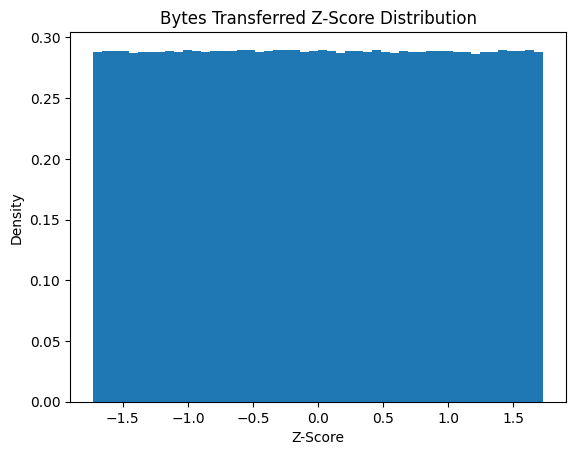

In [107]:
# Bytes transferred analysis

# since this is the only numerical column, perform some basic statistics on it

# summary statistics
bytes_stats = Data_source_pl.select('bytes_transferred').describe()
print("Bytes Transferred Statistics:")
print(bytes_stats)

#Distribution like plot by z score normalization
bytes_mean = Data_source_pl.select(pl.col('bytes_transferred').mean()).to_series()[0]
bytes_std = Data_source_pl.select(pl.col('bytes_transferred').std()).to_series()[0]
z_Data_source_pl = Data_source_pl.with_columns([
    ((pl.col('bytes_transferred') - bytes_mean) / bytes_std).alias('bytes_transferred_zscore')  
])  
plt.hist(z_Data_source_pl.select('bytes_transferred_zscore').to_series(), bins=50, density=True)
plt.title('Bytes Transferred Z-Score Distribution')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.show()



Z score distribution is failing here for this column.

In [108]:
# User agent analysis

unique_user_agents = Data_source_pl.select(pl.col('user_agent').unique())
print(f"Total unique user agents in the dataset: {unique_user_agents.height}")
# frequencies for each unique user agent
user_agent_frequencies = (
    Data_source_pl
    .group_by('user_agent')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All user agents by frequency:")
for row in user_agent_frequencies.iter_rows():
    print(f"User Agent: {row[0]}, Count: {row[1]}")

Total unique user agents in the dataset: 5
All user agents by frequency:
User Agent: curl/7.64.1, Count: 1200739
User Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36, Count: 1200722
User Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36, Count: 1200062
User Agent: Nmap Scripting Engine, Count: 1199655
User Agent: SQLMap/1.6-dev, Count: 1198822


In [109]:
# Request path analysis

unique_request_paths = Data_source_pl.select(pl.col('request_path').unique())
print(f"Total unique request paths in the dataset: {unique_request_paths.height}")
# frequencies for each unique request path
request_path_frequencies = (
    Data_source_pl
    .group_by('request_path')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All request paths by frequency:")
for row in request_path_frequencies.iter_rows():
    print(f"Request Path: {row[0]}, Count: {row[1]}")

Total unique request paths in the dataset: 228
All request paths by frequency:
Request Path: /, Count: 2741075
Request Path: /login, Count: 414760
Request Path: /admin/config, Count: 226796
Request Path: /secure, Count: 226412
Request Path: /auth, Count: 225761
Request Path: /api/v1/data, Count: 225575
Request Path: /api/login, Count: 189229
Request Path: /wp-login.php, Count: 188984
Request Path: /dashboard, Count: 188793
Request Path: /index.php, Count: 188675
Request Path: /admin, Count: 188194
Request Path: /files, Count: 65650
Request Path: /backup, Count: 65452
Request Path: /upload, Count: 65445
Request Path: /download, Count: 65432
Request Path: /home/user, Count: 62969
Request Path: /bin/bash, Count: 62893
Request Path: /etc/passwd, Count: 62815
Request Path: /root, Count: 62701
Request Path: /?phpmyadmin, Count: 42597
Request Path: /?backup.sql, Count: 42471
Request Path: /?..\..\etc\passwd, Count: 42457
Request Path: /?admin, Count: 42221
Request Path: /?login, Count: 42146


# updating data frame with new columns

# 1. source IPs where start with 192.168 are internal IPs rest are external IPs
# 2.user_agent_type as curl , browser  , nmap , SQLmap by checking user agent strings. (for browser check for common browser strings like Mozilla, Chrome, Safari, Edge etc. For curl check for curl string. For nmap check for nmap string. For SQLmap check for sqlmap string. Rest as others)
# 3. semantic_request_path as root_access [/root, /bin/bash, /home/user], auth_endpoint [login, /auth, /wp-login.php, /api/login], admin_endpoint [/admin, /admin/config, /dashboard],api_endpoint [/api/], file_access [/files, /download, /upload, /backup], lfi_attempt [etc/passwd, ../], sqli_attempt [DROP TABLE, UNION SELECT, sqlmap], scanner_activity [nmap, hydra], normal_page [/, /index.php, /secure] and unknown. 





In [110]:
Data_source_pl_3 = Data_source_pl.with_columns(
    [
        pl.when(pl.col("source_ip").str.starts_with("192.168."))
        .then(pl.lit("internal"))
        .otherwise(pl.lit("external"))
        .alias("source_ip_type"),

        pl.when(pl.col("user_agent").str.contains(r"(?i)sqlmap"))
        .then(pl.lit("sqlmap"))
        .when(pl.col("user_agent").str.contains(r"(?i)nmap"))
        .then(pl.lit("nmap"))
        .when(pl.col("user_agent").str.contains(r"(?i)curl"))
        .then(pl.lit("curl"))
        .when(
            pl.col("user_agent").str.contains(
                r"(?i)(mozilla|chrome|safari|edge|firefox)"
            )
        )
        .then(pl.lit("browser"))
        .otherwise(pl.lit("others"))
        .alias("user_agent_type"),

        pl.when(
            pl.col("request_path").str.contains(
                r"(?i)(etc/passwd|/proc/self|/proc/version|\.\./|\.\.\\)",
            )
        )
        .then(pl.lit("lfi_attempt"))

        .when(
            pl.col("request_path").str.contains(
                r"(?i)(select\s+.+\s+from|union\s+select|drop\s+table|insert\s+into|"
                r"update\s+\w+|delete\s+from|or\s+1=1|--|;--|sqlmap)"
            )
        )
        .then(pl.lit("sqli_attempt"))

        .when(
            pl.col("request_path").str.contains(
                r"(?i)(nmap|hydra|masscan|nikto|dirb|gobuster)"
            )
        )
        .then(pl.lit("scanner_activity"))

        .when(
            pl.col("request_path").str.contains(
                r"(?i)(/bin/(bash|sh)|/usr/bin|/root|/home/|cmd\.exe|powershell)"
            )
        )
        .then(pl.lit("root_access"))

        .when(
            pl.col("request_path").str.contains(
                r"(?i)(/admin|adminpanel|administrator|controlpanel|dashboard|manage)"
            )
        )
        .then(pl.lit("admin_endpoint"))

        .when(
            pl.col("request_path").str.contains(
                r"(?i)(/login|/auth|signin|signup|/wp-login\.php|/api/login|session)"
            )
        )
        .then(pl.lit("auth_endpoint"))

        .when(
            pl.col("request_path").str.contains(
                r"(?i)/api/|/v\d+/|/graphql"
            )
        )
        .then(pl.lit("api_endpoint"))

        .when(
            pl.col("request_path").str.contains(
                r"(?i)(/files|/download|/upload|/backup|\.zip|\.tar|\.gz|\.sql)"
            )
        )
        .then(pl.lit("file_access"))

        .when(
            pl.col("request_path").is_in(
                ["/", "/index.php", "/index.html", "/home", "/secure"]
            )
        )
        .then(pl.lit("normal_page"))

        .otherwise(pl.lit("unknown"))
        .alias("semantic_request_path"),
    ]
)


In [111]:
Data_source_pl_3.describe()

statistic,timestamp,source_ip,dest_ip,protocol,action,threat_label,log_type,bytes_transferred,user_agent,request_path,source_ip_type,user_agent_type,semantic_request_path
str,str,str,str,str,str,str,str,f64,str,str,str,str,str
"""count""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""",6e6,"""6000000""","""6000000""","""6000000""","""6000000""","""6000000"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,25046.492221,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,14401.631288,null,null,null,null,null
"""min""","""2024-01-01T00:00:00""","""103.172.167.96""","""192.168.1.1""","""FTP""","""allowed""","""benign""","""application""",100.0,"""Mozilla/5.0 (Macintosh; Intel …","""/""","""external""","""browser""","""admin_endpoint"""
"""25%""",null,null,null,null,null,null,null,12584.0,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,25036.0,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,37519.0,null,null,null,null,null
"""max""","""2024-12-30T00:00:00""","""98.153.120.136""","""192.168.1.99""","""UDP""","""blocked""","""suspicious""","""ids""",50000.0,"""curl/7.64.1""","""/wp-login.php?sqlmap""","""internal""","""sqlmap""","""unknown"""


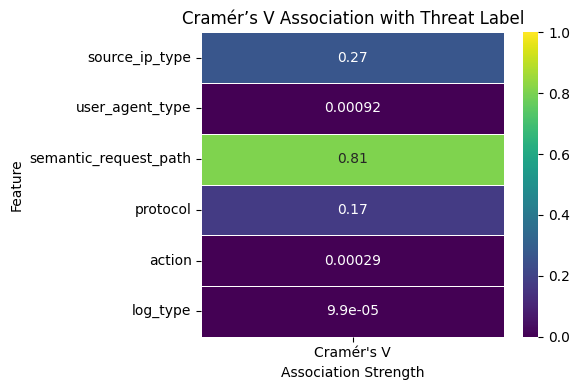

Cramér’s V Association with Threat Label:
source_ip_type: 0.2694
user_agent_type: 0.0009
semantic_request_path: 0.8085
protocol: 0.1732
action: 0.0003
log_type: 0.0001


In [112]:
# Cramér’s V Heatmap for categorical features vs target

from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns

def cramers_v(confusion_matrix: pd.DataFrame) -> float:
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_features = [
    "source_ip_type",
    "user_agent_type",
    "semantic_request_path",
    "protocol",
    "action",
    "log_type",
]

target = "threat_label"

df_pd = Data_source_pl_3.select(categorical_features + [target]).to_pandas()

cramers_v_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df_pd[feature], df_pd[target])
    cramers_v_results[feature] = cramers_v(contingency_table)

cramers_v_df = pd.DataFrame.from_dict(
    cramers_v_results, orient="index", columns=["Cramér's V"]
)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cramers_v_df,
    annot=True,
    cmap="viridis",
    vmin=0,
    vmax=1,
    linewidths=0.5,
)
plt.title("Cramér’s V Association with Threat Label")
plt.ylabel("Feature")
plt.xlabel("Association Strength")
plt.tight_layout()
plt.show()

print("Cramér’s V Association with Threat Label:")
for feature, value in cramers_v_results.items():
    print(f"{feature}: {value:.4f}")

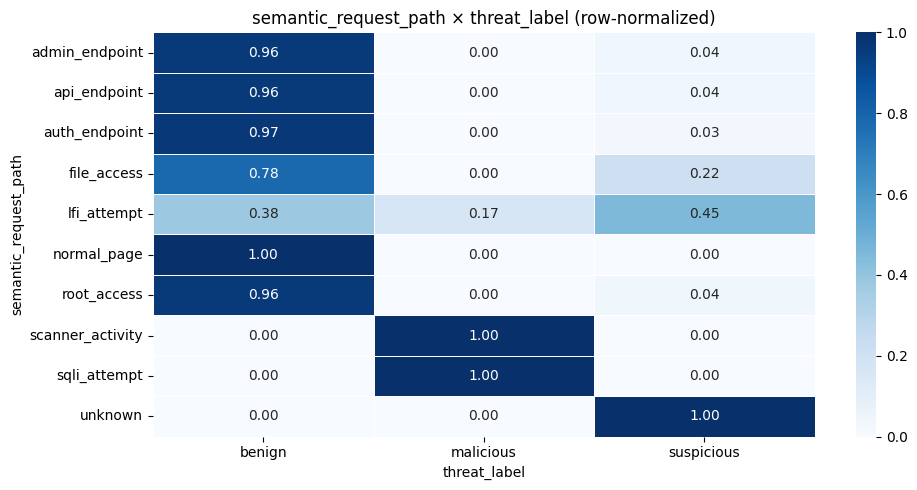

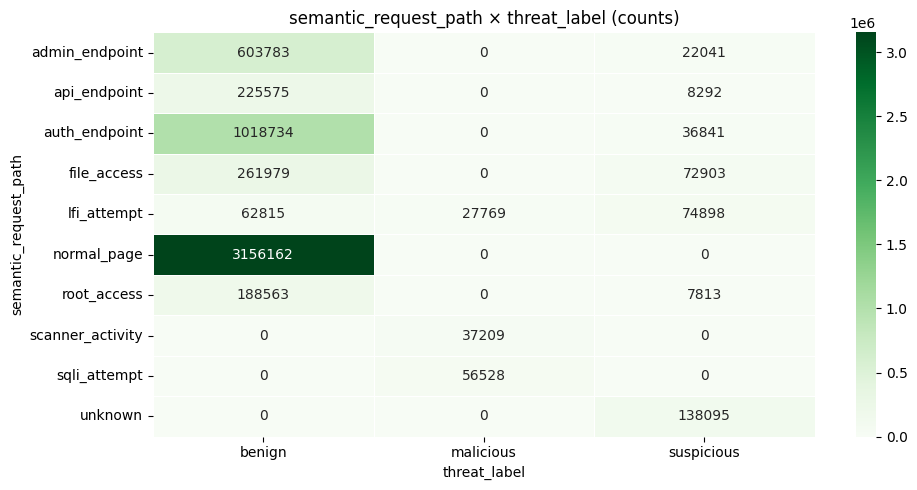

semantic_request_path × threat_label counts:
admin_endpoint: benign=603783 malicious=0 suspicious=22041 
api_endpoint: benign=225575 malicious=0 suspicious=8292 
auth_endpoint: benign=1018734 malicious=0 suspicious=36841 
file_access: benign=261979 malicious=0 suspicious=72903 
lfi_attempt: benign=62815 malicious=27769 suspicious=74898 
normal_page: benign=3156162 malicious=0 suspicious=0 
root_access: benign=188563 malicious=0 suspicious=7813 
scanner_activity: benign=0 malicious=37209 suspicious=0 
sqli_attempt: benign=0 malicious=56528 suspicious=0 
unknown: benign=0 malicious=0 suspicious=138095 


In [113]:
#Visualize semantic_request_path × threat_label heatmap

heat_df = Data_source_pl_3.select(["semantic_request_path", "threat_label"]).to_pandas()

ct = pd.crosstab(heat_df["semantic_request_path"], heat_df["threat_label"])

ct_norm = ct.div(ct.sum(axis=1), axis=0)

plt.figure(figsize=(10, 5))
sns.heatmap(ct_norm, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("semantic_request_path × threat_label (row-normalized)")
plt.ylabel("semantic_request_path")
plt.xlabel("threat_label")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens", linewidths=0.5)
plt.title("semantic_request_path × threat_label (counts)")
plt.ylabel("semantic_request_path")
plt.xlabel("threat_label")
plt.tight_layout()
plt.show()

print("semantic_request_path × threat_label counts:")
for row in ct.itertuples():
    print(f"{row.Index}: ", end="")
    for label, count in zip(ct.columns, row[1:]):
        print(f"{label}={count} ", end="")
    print()

Label Leakage Analysis
The threat labels show near deterministic dependence on semantic request path categories, indicating rule based label generation. Therefore, path derived features were excluded from downstream predictive modeling to avoid leakage.

In [115]:
Data_source_pl_4 = Data_source_pl_3.drop([
    "request_path",
    "semantic_request_path",
    "user_agent",
])